In [2]:
import sys
sys.path.insert(0, '/Users/erikstorrs/Documents/ding/mgitools/mgitools/')

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [17]:
import os

In [5]:
import docker

In [124]:
command = 'python /Users/erikstorrs/Documents/ding/mgitools/tests/data/test.py --verbose --\
cat-output /Users/erikstorrs/Documents/ding/mgitools/notebooks/output.txt /Users/erikstorrs/Documents/din\
g/mgitools/tests/data/test.txt'

In [125]:
commands = [command] * 50
commands = [c.replace('output.txt', f'output.{i}.txt') for i, c in enumerate(commands)]
f = open('commands.txt', 'w')
for command in commands:
    f.write(command + '\n')
f.close()

# commands

In [61]:
docker.remap_command(command)

('python /inputs/7be6aae2-0c53-46ac-931d-6b7cd1a4ab8a/test.py --verbose --cat-output /inputs/386e0bee-1b48-4e25-893a-1772a3ad95b0/output.txt /inputs/7be6aae2-0c53-46ac-931d-6b7cd1a4ab8a/test.txt',
 {'/Users/erikstorrs/Documents/ding/mgitools/tests/data': '/inputs/7be6aae2-0c53-46ac-931d-6b7cd1a4ab8a',
  '/Users/erikstorrs/Documents/ding/mgitools/notebooks': '/inputs/386e0bee-1b48-4e25-893a-1772a3ad95b0'})

In [122]:
docker.generate_docker_command(commands[-1], 'python:3.6', return_list=True)

['docker',
 'run',
 '-d',
 '-v',
 '/Users/erikstorrs/Documents/ding/mgitools/tests/data:/inputs/f0e9e6c8-c467-4525-bdc6-be8525946eaf',
 '-v',
 '/Users/erikstorrs/Documents/ding/mgitools/notebooks:/inputs/758d6fec-8c2b-4d40-a58d-7c103b8136ec',
 '-m',
 '2G',
 'python:3.6',
 'python',
 '/inputs/f0e9e6c8-c467-4525-bdc6-be8525946eaf/test.py',
 '--verbose',
 '--cat-output',
 '/inputs/758d6fec-8c2b-4d40-a58d-7c103b8136ec/output.49.txt',
 '/inputs/f0e9e6c8-c467-4525-bdc6-be8525946eaf/test.txt']

In [119]:
docker.execute_commands(commands, 'python:3.6', wait_time=10)

2019-05-28 16:10:34,092 - container id: 4ed17931e847aad386757dd67f9f6c5a8698f630415dccf98c26de20eb9fa144 is executing: python /Users/erikstorrs/Documents/ding/mgitools/tests/data/test.py --verbose --cat-output /Users/erikstorrs/Documents/ding/mgitools/notebooks/output.4.txt /Users/erikstorrs/Documents/ding/mgitools/tests/data/test.txt
2019-05-28 16:10:35,102 - container id: b54da95e5733ed9dba7c89e9fe35d356dff5f2197da600a8287ffb1a2fd2a003 is executing: python /Users/erikstorrs/Documents/ding/mgitools/tests/data/test.py --verbose --cat-output /Users/erikstorrs/Documents/ding/mgitools/notebooks/output.3.txt /Users/erikstorrs/Documents/ding/mgitools/tests/data/test.txt
2019-05-28 16:10:36,072 - container id: eabc42e578fc2445cc8f2e2d04b5e6e872765e99378f7c66026078330ed7dae7 is executing: python /Users/erikstorrs/Documents/ding/mgitools/tests/data/test.py --verbose --cat-output /Users/erikstorrs/Documents/ding/mgitools/notebooks/output.2.txt /Users/erikstorrs/Documents/ding/mgitools/tests/dat

In [19]:
os.path.abspath("/Users/erikstorrs/Documents/ding/mgitools/mgitools")

'/Users/erikstorrs/Documents/ding/mgitools/mgitools'

In [20]:
'hello.txt'.split('/')

['hello.txt']

In [98]:
sys.stderr


In [69]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


In [66]:
d = json.load(open('/Users/erikstorrs/Downloads/12.png.json'))

In [67]:
d

{'tags': [],
 'description': '',
 'objects': [{'description': '',
   'bitmap': None,
   'tags': [],
   'classTitle': 'Polygon Cell',
   'points': {'exterior': [[116.0, 205.0],
     [118.0, 200.0],
     [122.0, 194.0],
     [126.0, 188.0],
     [131.0, 184.0],
     [138.0, 183.0],
     [143.0, 184.0],
     [148.0, 187.0],
     [152.0, 189.0],
     [155.0, 192.0],
     [158.0, 195.0],
     [161.0, 198.0],
     [165.0, 201.0],
     [165.0, 206.0],
     [167.0, 213.0],
     [169.0, 218.0],
     [172.0, 224.0],
     [168.0, 228.0],
     [166.0, 232.0],
     [166.0, 236.0],
     [165.0, 241.0],
     [164.0, 244.0],
     [160.0, 249.0],
     [155.0, 251.0],
     [150.0, 252.0],
     [145.0, 250.0],
     [143.0, 245.0],
     [141.0, 241.0],
     [137.0, 239.0],
     [134.0, 238.0],
     [129.0, 237.0],
     [126.0, 233.0],
     [124.0, 225.0],
     [122.0, 221.0],
     [120.0, 217.0],
     [118.0, 212.0],
     [115.0, 208.0]],
    'interior': []}},
  {'description': '',
   'bitmap': None,
   '

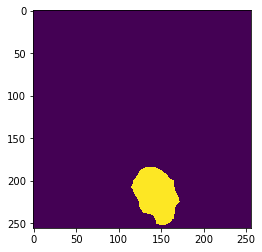

In [73]:
for obj in d['objects']:
    pts = [(x, y) for x, y in obj['points']['exterior']]

#     m = np.zeros((256,256), dtype=bool)
    img = Image.new('L', (256, 256), 0)
    ImageDraw.Draw(img).polygon(pts, outline=1, fill=1)
    mask = np.array(img)
    plt.imshow(mask)
    break
    